# ImageNet Extract

This notebook extracts the ImageNet dataset into a format that can be used by the image colorizer.

## Exploring the ImageNet dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imsave, imread

%matplotlib inline

In [2]:
def unpickle(file):
    with np.load(file) as fo:
        data = fo["data"]
    return data

In [3]:
file = "data/train_data_batch_1.npz"
data = unpickle(file)

In [3]:
def get_image(data, index, labels=None, mean=None):
    return data[index].reshape(3, 64, 64).transpose(1, 2, 0).astype(np.uint8)

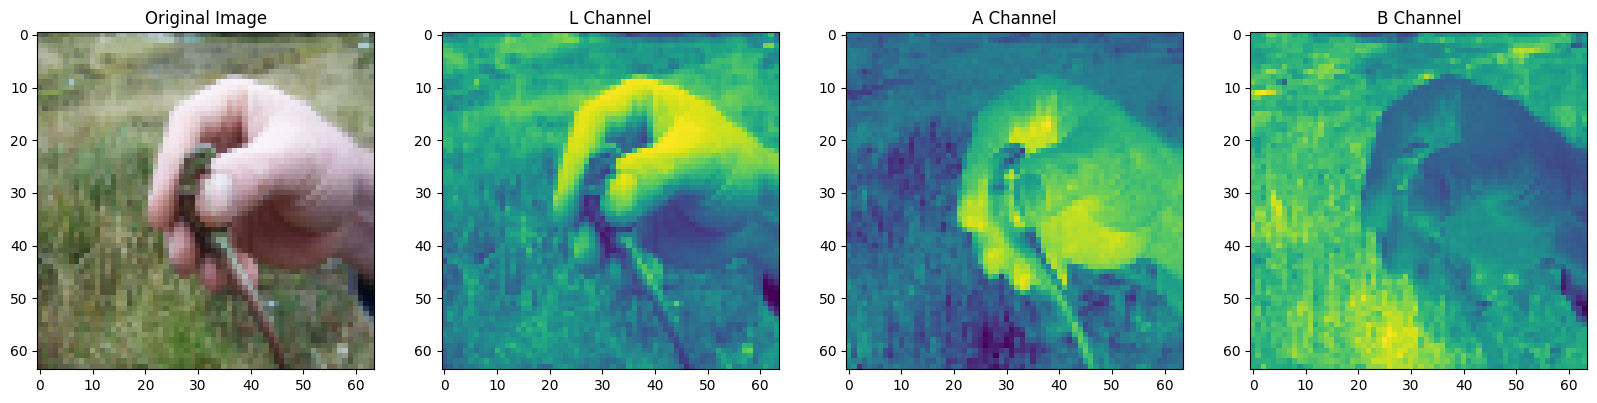

In [6]:
im = get_image(data, np.random.uniform(0, data.shape[0], 1).astype(int))

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(im, interpolation=None)
ax[0].set_title("Original Image")

im_lab = rgb2lab(im)
ax[1].imshow(im_lab[:, :, 0], interpolation=None)
ax[1].set_title("L Channel")

ax[2].imshow(im_lab[:, :, 1], interpolation=None)
ax[2].set_title("A Channel")

ax[3].imshow(im_lab[:, :, 2], interpolation=None)
ax[3].set_title("B Channel")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Difference')

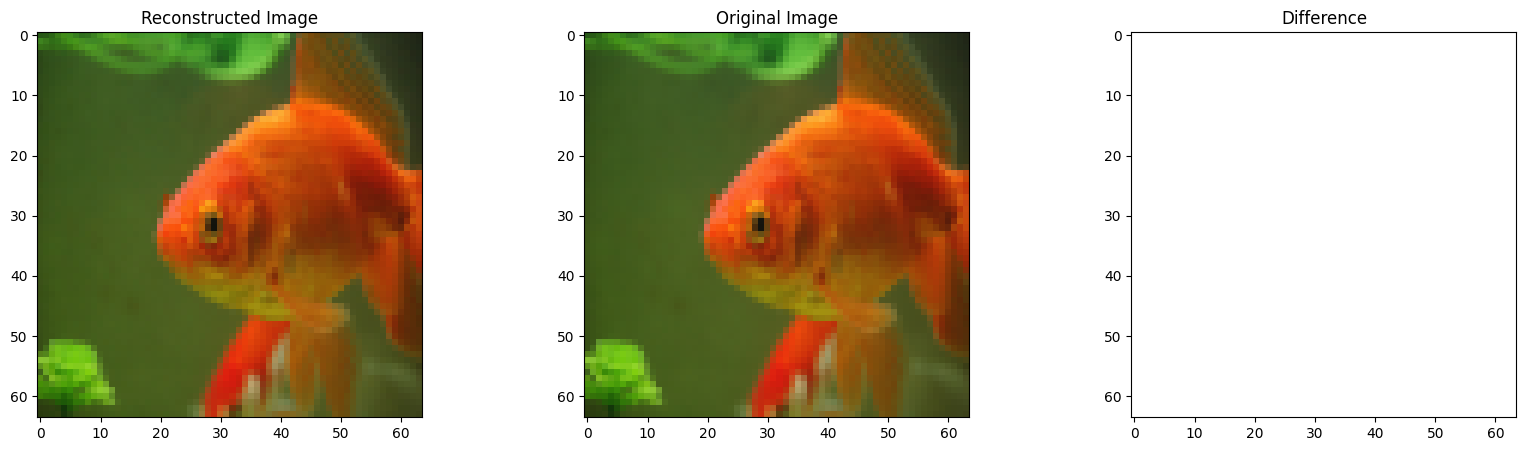

In [7]:
im = get_image(data, np.random.uniform(0, data.shape[0], 1).astype(int))


im_lab = rgb2lab(im)
im_rgb = lab2rgb(im_lab)
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].imshow(im_rgb, interpolation=None) 
ax[0].set_title("Reconstructed Image")

ax[1].imshow(im, interpolation=None)
ax[1].set_title("Original Image")


## Extracting the ImageNet dataset

Read as RGB color space and save to disk.

In [5]:
import os
import numpy as np
from skimage.color import rgb2lab
from skimage.io import imsave
from tqdm import tqdm

def unpickle(file):
    with np.load(file) as fo:
        data = fo["data"]
    return data

if not os.path.exists("data/train"):
    os.makedirs("data/train")

if not os.path.exists("data/test"):
    os.makedirs("data/test")


# train
for i in range(1, 11):
    file = f"data/train_data_batch_{i}.npz"
    data = unpickle(file)

    for j in tqdm(range(data.shape[0]), desc=f"Train batch {i}"):
        im = data[j].reshape(3, 64, 64).transpose(1, 2, 0).astype(np.uint8)
        imsave(f"data/train/im{(i-1) * data.shape[0] + j}.png", im, check_contrast=False)
    
    del data

# val
file = "data/val_data.npz"
data = unpickle(file)

for j in tqdm(range(data.shape[0]), desc="Val"):
    im = data[j].reshape(3, 64, 64).transpose(1, 2, 0).astype(np.uint8)
    imsave(f"data/test/im{j}.png", im, check_contrast=False)

del data

Val: 100%|██████████| 50000/50000 [00:37<00:00, 1338.66it/s]
